# First part of Work

This notebook shows, that Dataframe was a little bit "dirty", and I decided to clean up it)

Also it's like an EDA part))

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline             # import packages

In [129]:
df = pd.read_csv('data.csv')
test_df = pd.read_csv('test.csv')
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by = 'Date')
df                               # import dfs

,Date,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice
0,2016-04-14,111.58,35,111.59,300,111.59,111.62,111.63,112.0400,263236,22556,111.64
102,2016-04-14,7.87,1201,7.88,199,7.87,7.82,7.81,7.8500,4375,-6440,7.80
101,2016-04-14,14.49,100,14.53,1300,14.49,14.46,14.46,14.5100,1509,-672,14.44
100,2016-04-14,0.35,2500,0.36,5000,0.35,0.33,0.32,0.2444,76937,-174245,0.35
99,2016-04-14,50.50,331,50.87,300,50.74,50.74,50.75,50.6200,4,46,50.60
...,...,...,...,...,...,...,...,...,...,...,...,...
18542,2016-09-14,12.76,100,12.88,100,12.63,12.63,12.60,12.3100,97166,-5309,12.63
18543,2016-09-14,127.33,350,127.44,300,127.33,127.00,127.00,127.2100,88726,-113948,126.94
18544,2016-09-14,14.90,4805,199999.99,300,15.01,15.01,15.02,14.9200,48,52,15.01
18546,2016-09-14,118.30,100,119.00,200,119.00,119.06,119.06,116.8400,11585,1784,119.06


In [130]:
df.describe() # statistical invariantes

,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice
count,18651.000000,1.865100e+04,18651.000000,18651.000000,18651.000000,18651.000000,18651.000000,18651.000000,1.865100e+04,1.865100e+04,18651.000000
mean,49.808722,7.483422e+03,2769.878478,2715.718353,109.851994,109.834677,135.859794,51.318909,2.773807e+04,-2.133085e+03,50.633185
std,118.884831,1.129521e+05,22194.878283,16258.658494,3356.309019,3356.309296,3940.845536,143.405179,1.062102e+05,6.311341e+04,118.939909
min,0.000000,0.000000e+00,0.000000,0.000000,0.003500,0.000100,0.000000,0.004000,0.000000e+00,-2.398686e+06,0.003000
25%,4.990000,1.000000e+02,6.200000,100.000000,5.705000,5.700000,4.720000,5.745000,8.305000e+02,-3.622500e+03,5.695000
50%,20.500000,2.000000e+02,23.500000,200.000000,21.620000,21.590000,20.700000,21.670000,5.001000e+03,4.000000e+00,21.560000
75%,50.400000,9.380000e+02,54.625000,900.000000,51.290000,51.375000,51.430000,51.040000,1.850250e+04,2.367000e+03,51.045000
max,1437.000000,3.623700e+06,199999.990000,633852.000000,199999.990000,199999.990000,199999.990000,10855.660000,5.576209e+06,1.963809e+06,1435.000000


In [131]:
df.Date.value_counts(normalize = True) # days in train 

2016-06-24    0.019838
2016-06-27    0.012064
2016-06-20    0.011849
2016-07-15    0.011742
2016-06-29    0.011742
                ...   
2016-06-22    0.007131
2016-05-18    0.007131
2016-05-27    0.006702
2016-06-21    0.006434
2016-05-12    0.005737
Name: Date, Length: 107, dtype: float64

In [132]:
test_df.Date.value_counts(normalize = True) # days in test 

2016-09-16    0.059381
2016-09-19    0.054773
2016-09-21    0.051702
2016-09-26    0.051190
2016-10-13    0.051190
2016-10-03    0.047863
2016-10-06    0.047351
2016-09-22    0.047095
2016-10-10    0.047095
2016-09-20    0.045303
2016-09-28    0.044791
2016-09-29    0.044279
2016-10-11    0.044024
2016-09-27    0.042488
2016-10-07    0.041720
2016-09-30    0.041720
2016-10-04    0.041208
2016-09-23    0.040440
2016-09-15    0.039672
2016-10-14    0.039416
2016-10-05    0.039160
2016-10-12    0.038137
Name: Date, dtype: float64

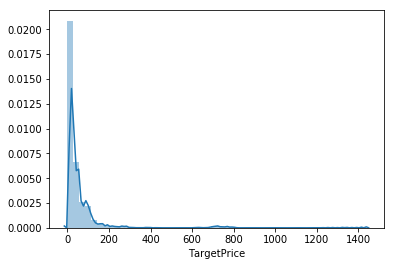

In [133]:
sns.distplot(df.TargetPrice) # target distribution - looks terrible))

#### Preprocess FeaturePrice1

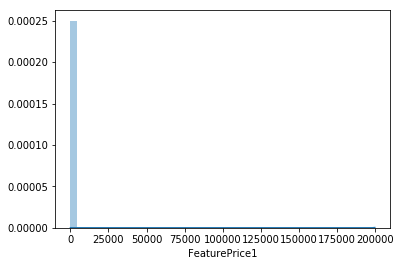

In [134]:
sns.distplot(df.FeaturePrice1) # plot distribution

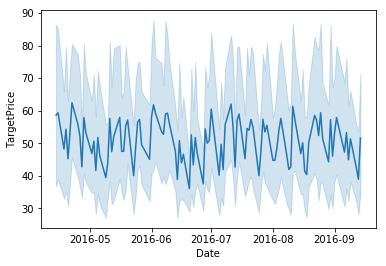

In [135]:
sns.lineplot(x = df.Date, y = df.TargetPrice) # plot time series of target 

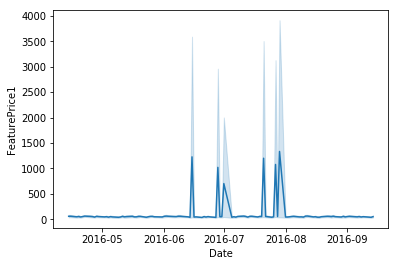

In [136]:
sns.lineplot(x = df.Date, y = df.FeaturePrice1) # plot time series of FeaturePrice1

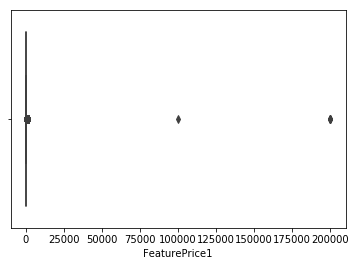

In [137]:
sns.boxplot(x = df.FeaturePrice1) # detect anomalies

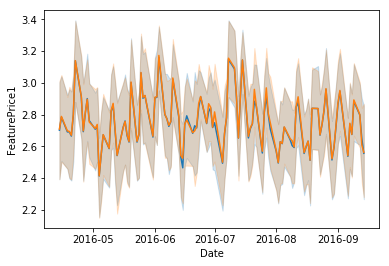

In [138]:
sns.lineplot(x = df.Date, y = np.log(df.TargetPrice))
sns.lineplot(x = df.Date, y = np.log(df.FeaturePrice1)) # honestly I didn’t understand what can be learned
                                                        # from this

In [139]:
print(df[['FeaturePrice1','TargetPrice']][df.FeaturePrice1 > df.FeaturePrice1.mean() + 4000])

#print with filter

       FeaturePrice1  TargetPrice
7252       199999.99        26.50
8994       199999.99         8.46
9547       100000.00        10.14
11817      199999.99         1.00
12439      199999.99         7.50
12974      199999.99       590.62


Just this abnormal values made me to delete some rows))

In [140]:
np.corrcoef(np.log(df.TargetPrice), np.log(df.FeaturePrice1)) # corr coef to loged values

array([[1.        , 0.99296929],
       [0.99296929, 1.        ]])

In [141]:
np.corrcoef(df.TargetPrice, df.FeaturePrice1) # corr coef without log

array([[1.        , 0.04507929],
       [0.04507929, 1.        ]])

In [142]:
df[df.FeaturePrice1 > 4000] # print with filter

,Date,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice
7252,2016-06-15,26.76,1200,27.05,1100,199999.99,199999.99,0.0,26.97,5394,116,26.50
8994,2016-06-28,8.65,8,199999.99,100,199999.99,199999.99,0.0,7.99,1939,562,8.46
9547,2016-07-01,0.01,200,100000.00,100,100000.00,100000.00,128000.0,10.10,0,95,10.14
11817,2016-07-21,0.01,100,199999.99,100,199999.99,199999.99,0.0,0.85,1425,1575,1.00
12439,2016-07-27,0.01,100,199999.99,100,199999.99,199999.99,0.0,6.90,200,150,7.50
12974,2016-07-29,0.00,0,0.00,0,199999.99,199999.99,0.0,10855.66,9705,16761,590.62


In [143]:
df = df.drop(index = df[df.FeaturePrice1 > 4000].index, axis = 0)
df.FeaturePrice1.max() #delete anomalies

1437.0

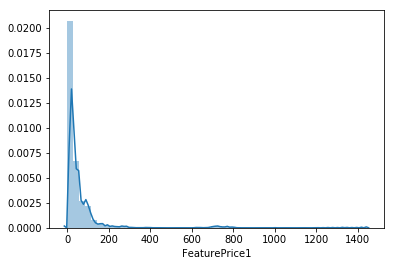

In [144]:
sns.distplot(df.FeaturePrice1) # that looks better))

In [145]:
df.describe()

,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice
count,18645.000000,1.864500e+04,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000,1.864500e+04,1.864500e+04,18645.000000
mean,49.822850,7.485744e+03,2733.224805,2716.511826,50.890297,50.872974,129.038403,50.750362,2.774599e+04,-2.134804e+03,50.614927
std,118.901219,1.129702e+05,22045.466452,16261.212835,119.336689,119.335934,3828.615038,119.623057,1.062264e+05,6.312340e+04,118.891413
min,0.000000,0.000000e+00,0.000000,0.000000,0.003500,0.000100,0.000000,0.004000,0.000000e+00,-2.398686e+06,0.003000
25%,4.990000,1.000000e+02,6.200000,100.000000,5.700000,5.700000,4.740000,5.740000,8.310000e+02,-3.623000e+03,5.690000
50%,20.510000,2.000000e+02,23.490000,200.000000,21.610000,21.560000,20.740000,21.680000,5.001000e+03,3.000000e+00,21.560000
75%,50.410000,9.380000e+02,54.600000,900.000000,51.270000,51.350000,51.430000,51.040000,1.851000e+04,2.368000e+03,51.050000
max,1437.000000,3.623700e+06,199999.990000,633852.000000,1437.000000,1435.000000,199999.990000,1765.060000,5.576209e+06,1.963809e+06,1435.000000


#### Preprocess FeaturePrice3

In [146]:
df = df.drop(index = df[df.FeaturePrice3 > 4000].index, axis = 0)
df.describe() # delete anomalies

,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice
count,18637.000000,1.863700e+04,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,1.863700e+04,1.863700e+04,18637.000000
mean,49.837681,7.488839e+03,2723.647738,2717.590492,50.838881,50.821528,50.862321,50.757882,2.775779e+04,-2.135943e+03,50.622283
std,118.924337,1.129944e+05,22027.108258,16264.619127,119.158341,119.157579,119.804231,119.647471,1.062477e+05,6.313692e+04,118.915682
min,0.000000,0.000000e+00,0.000000,0.000000,0.003500,0.000100,0.000000,0.004000,0.000000e+00,-2.398686e+06,0.003000
25%,5.000000,1.000000e+02,6.190000,100.000000,5.700000,5.690000,4.720000,5.740000,8.360000e+02,-3.625000e+03,5.680000
50%,20.510000,2.000000e+02,23.480000,200.000000,21.600000,21.560000,20.700000,21.670000,5.006000e+03,3.000000e+00,21.560000
75%,50.420000,9.430000e+02,54.590000,900.000000,51.270000,51.320000,51.400000,51.040000,1.851300e+04,2.369000e+03,51.050000
max,1437.000000,3.623700e+06,199999.990000,633852.000000,1437.000000,1435.000000,1435.000000,1765.060000,5.576209e+06,1.963809e+06,1435.000000


#### Preprocess Bid_Price

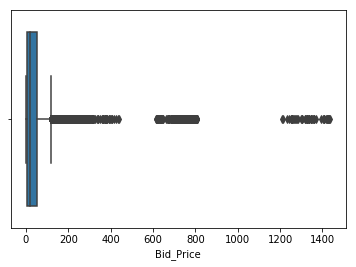

In [147]:
sns.boxplot(df.Bid_Price)  # after looking on boxplot, I thought that with this feature everything is okay) 

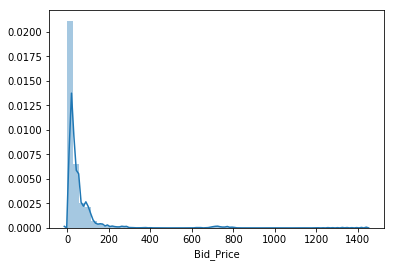

In [148]:
sns.distplot(df.Bid_Price)

#### Preprocess Bid_Shares, Ask_Price, Ask_Shares

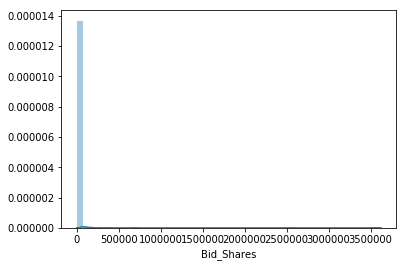

In [149]:
sns.distplot(df.Bid_Shares) # so tarrible dist

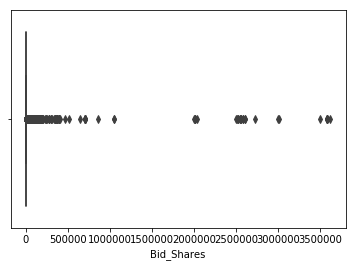

In [150]:
sns.boxplot(df.Bid_Shares) # How many discarded from distribution values We have

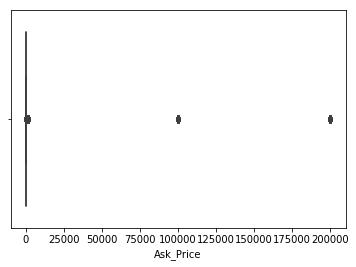

In [151]:
sns.boxplot(df.Ask_Price) # also anomalies

In [152]:
df = df.drop(index = df[df.Ask_Price > 22027].index, axis = 0) # delete it

In [153]:
df.describe()

,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice
count,18349.000000,1.834900e+04,18349.000000,18349.000000,18349.000000,18349.000000,18349.000000,18349.000000,1.834900e+04,1.834900e+04,18349.000000
mean,50.471296,6.202762e+03,52.352993,2758.408306,51.356662,51.339539,51.458448,51.329723,2.818459e+04,-2.095334e+03,51.191086
std,119.725228,9.696882e+04,121.453112,16388.481206,119.774833,119.773831,120.622165,120.472698,1.070226e+05,6.337463e+04,119.735263
min,0.000000,0.000000e+00,0.000000,0.000000,0.003500,0.000100,0.000000,0.004000,0.000000e+00,-2.398686e+06,0.003500
25%,5.150000,1.000000e+02,5.990000,100.000000,5.820000,5.800000,4.840000,5.840000,9.230000e+02,-3.730000e+03,5.820000
50%,21.000000,2.000000e+02,22.770000,200.000000,21.860000,21.840000,21.000000,21.900000,5.197000e+03,3.000000e+00,21.860000
75%,50.720000,9.830000e+02,52.680000,950.000000,51.800000,51.820000,51.960000,51.500000,1.896200e+04,2.443000e+03,51.520000
max,1437.000000,3.623700e+06,1630.800000,633852.000000,1437.000000,1435.000000,1435.000000,1765.060000,5.576209e+06,1.963809e+06,1435.000000


19


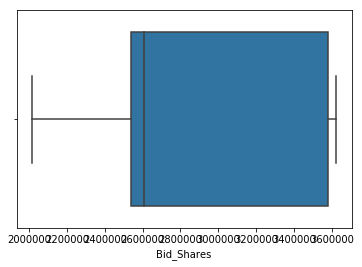

In [166]:
sns.boxplot(df.Bid_Shares[df.Bid_Shares > 900000])
print(len(df.Bid_Shares[df.Bid_Shares > 900000])) 

In [167]:
df = df.drop(index = df[df.Bid_Shares > 900000].index, axis = 0) # delete anomalies
                                                                 # (in my opinion this values is unnormal)

In [168]:
df.describe()

,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice
count,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,1.833000e+04,1.833000e+04,18330.000000
mean,50.523602,3223.212057,52.406925,2752.095690,51.409883,51.392744,51.511783,51.382918,2.821266e+04,-2.012082e+03,51.244137
std,119.776237,23266.107440,121.504486,16395.416103,119.825482,119.824487,120.673285,120.523786,1.070745e+05,6.298513e+04,119.785961
min,0.000000,0.000000,0.000000,0.000000,0.005000,0.000100,0.000000,0.004500,0.000000e+00,-2.398686e+06,0.003500
25%,5.200000,100.000000,6.002500,100.000000,5.880000,5.850000,4.870000,5.892500,9.330000e+02,-3.728750e+03,5.857500
50%,21.065000,200.000000,22.810000,200.000000,21.910000,21.900000,21.030000,21.930000,5.217000e+03,3.000000e+00,21.910000
75%,50.730000,960.000000,52.737500,930.000000,51.827500,51.850000,52.000000,51.527500,1.898175e+04,2.443000e+03,51.570000
max,1437.000000,863482.000000,1630.800000,633852.000000,1437.000000,1435.000000,1435.000000,1765.060000,5.576209e+06,1.963809e+06,1435.000000


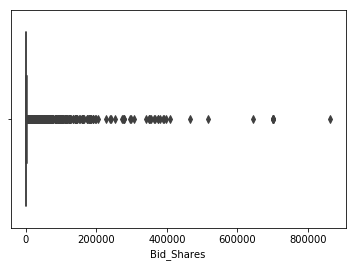

In [174]:
sns.boxplot(df.Bid_Shares)

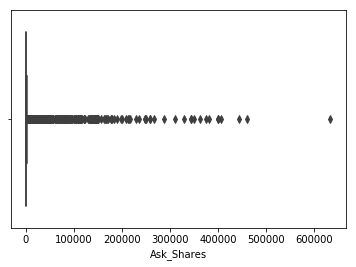

In [170]:
sns.boxplot(df.Ask_Shares)

#### Preprocess FeatureShares1, FeatureShares2

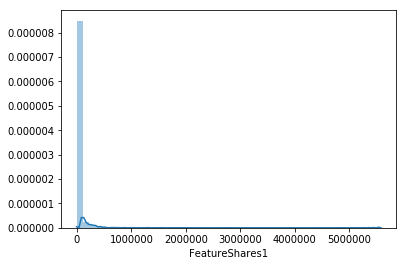

In [175]:
sns.distplot(df.FeatureShares1)

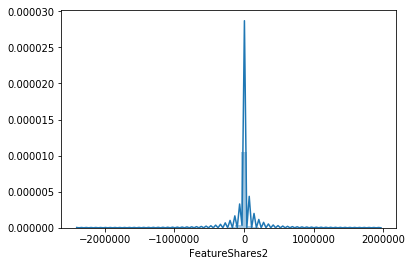

In [176]:
sns.distplot(df.FeatureShares2)

In [177]:
np.corrcoef(df.FeatureShares1, df.FeatureShares2)

array([[ 1.        , -0.04751832],
       [-0.04751832,  1.        ]])

In [178]:
np.corrcoef(df.FeatureShares1, np.abs(df.FeatureShares2))

array([[1.        , 0.45861946],
       [0.45861946, 1.        ]])

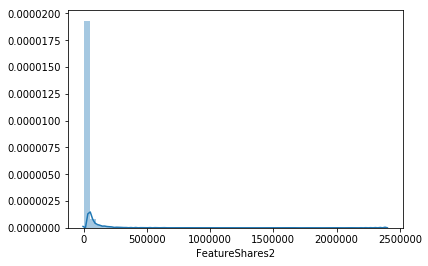

In [179]:
sns.distplot(np.abs(df.FeatureShares2))

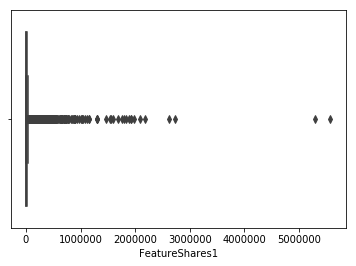

In [180]:
sns.boxplot(df.FeatureShares1) #looks for anomalies

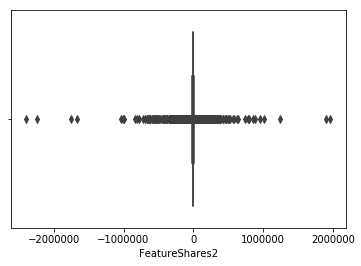

In [183]:
sns.boxplot(df.FeatureShares2) # honestly I didn’t understand why this feature has negative values
                               # also I want to make "abs()" to this values, but I wasn't sure
                               # if this is correct because
                               # I didn't understand the real meaning of this feature

In [189]:
df = df.drop(index = df[df.FeatureShares1 > 2300000].index, axis = 0) # drop anomalies

In [190]:
df.describe()

,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice
count,18326.000000,18326.000000,18326.000000,18326.000000,18326.000000,18326.000000,18326.000000,18326.000000,1.832600e+04,1.832600e+04,18326.000000
mean,50.524562,3222.870730,52.408281,2751.391793,51.411021,51.393864,51.512929,51.383999,2.733409e+04,-2.079081e+03,51.245239
std,119.788216,23268.388254,121.516652,16396.574881,119.837460,119.836463,120.685360,120.535829,8.666960e+04,6.263156e+04,119.797937
min,0.000000,0.000000,0.000000,0.000000,0.005000,0.000100,0.000000,0.004500,0.000000e+00,-2.398686e+06,0.003500
25%,5.200000,100.000000,6.002500,100.000000,5.880000,5.850000,4.870000,5.892500,9.322500e+02,-3.729000e+03,5.857500
50%,21.055000,200.000000,22.810000,200.000000,21.905000,21.895000,21.030000,21.930000,5.213000e+03,3.000000e+00,21.905000
75%,50.730000,960.000000,52.720000,929.750000,51.815000,51.850000,52.000000,51.520000,1.897000e+04,2.441750e+03,51.570000
max,1437.000000,863482.000000,1630.800000,633852.000000,1437.000000,1435.000000,1435.000000,1765.060000,2.184752e+06,1.963809e+06,1435.000000


In [194]:
df.corr() # print corr table

,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice
Bid_Price,1.000000,-0.040881,0.986718,-0.046090,0.999507,0.999500,0.991027,0.993160,0.015792,0.004452,0.999695
Bid_Shares,-0.040881,1.000000,-0.042256,0.455668,-0.041795,-0.041776,-0.041708,-0.041645,0.051526,0.036018,-0.041641
Ask_Price,0.986718,-0.042256,1.000000,-0.047697,0.988008,0.987995,0.979314,0.981458,0.011430,0.004663,0.987912
Ask_Shares,-0.046090,0.455668,-0.047697,1.000000,-0.047142,-0.047113,-0.047181,-0.046926,0.083002,0.061748,-0.046954
FeaturePrice1,0.999507,-0.041795,0.988008,-0.047142,1.000000,0.999966,0.991601,0.993441,0.013819,0.004246,0.999884
FeaturePrice2,0.999500,-0.041776,0.987995,-0.047113,0.999966,1.000000,0.991636,0.993409,0.013808,0.004822,0.999858
FeaturePrice3,0.991027,-0.041708,0.979314,-0.047181,0.991601,0.991636,1.000000,0.987298,0.013182,0.007971,0.991659
FeaturePrice4,0.993160,-0.041645,0.981458,-0.046926,0.993441,0.993409,0.987298,1.000000,0.013765,0.004545,0.993548
FeatureShares1,0.015792,0.051526,0.011430,0.083002,0.013819,0.013808,0.013182,0.013765,1.000000,-0.098018,0.014209
FeatureShares2,0.004452,0.036018,0.004663,0.061748,0.004246,0.004822,0.007971,0.004545,-0.098018,1.000000,0.004555


In [195]:
df.to_csv('cleaned_train_df.csv', index = False)